In [1]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [2]:
data = pd.read_csv('bigml_59c28831336c6604c800002a.csv')
data.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [8]:
# Define features 

X = data.drop(columns=['churn', 'voice mail plan', 'international plan', 'phone number', 'state'])
y = data['churn']

In [9]:
# split data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# initialize the model
model = RandomForestClassifier(n_estimators=100, random_state=42)

In [11]:
# fit the model
model.fit(X_train, y_train)
# make predictions
y_pred = model.predict(X_test)

In [14]:
# evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

Accuracy: 0.9220


In [15]:
# classification report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

       False       0.93      0.99      0.96       566
        True       0.88      0.56      0.69       101

    accuracy                           0.92       667
   macro avg       0.90      0.78      0.82       667
weighted avg       0.92      0.92      0.91       667



In [17]:
# Feature importance
importances = model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print("Feature Importances:")
print(feature_importance_df)


Feature Importances:
                   Feature  Importance
5         total day charge    0.152079
3        total day minutes    0.141060
15  customer service calls    0.132410
8         total eve charge    0.083403
6        total eve minutes    0.075435
9      total night minutes    0.047959
11      total night charge    0.043485
10       total night calls    0.043002
2    number vmail messages    0.042342
12      total intl minutes    0.042247
4          total day calls    0.040971
14       total intl charge    0.039517
0           account length    0.039402
7          total eve calls    0.037685
13        total intl calls    0.028092
1                area code    0.010910


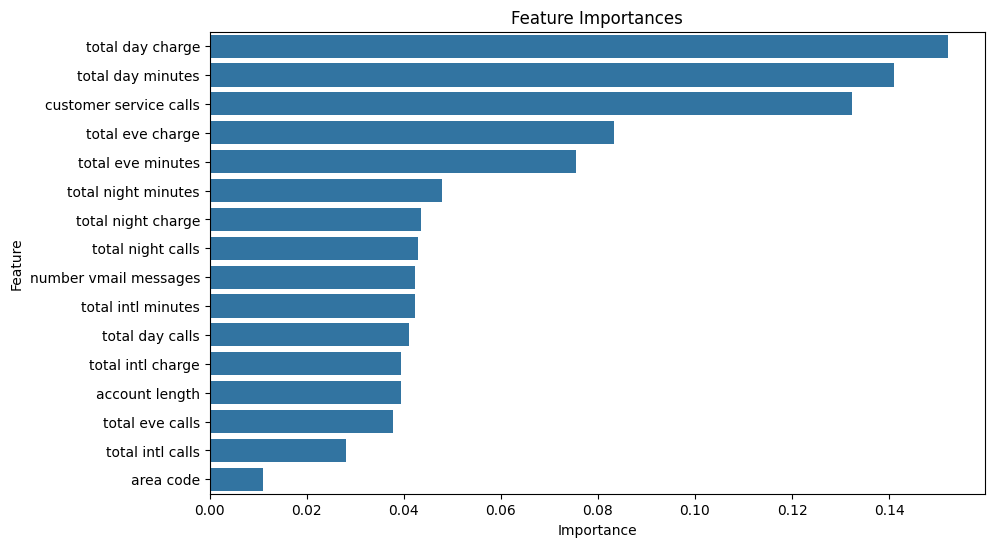

In [18]:
# plot feature importances
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [19]:
! pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.9/253.9 MB 1.2 MB/s eta 0:00:00m eta 0:00:010:00:05
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.1/318.1 MB 1.6 MB/s eta 0:00:00m eta 0:00:010:00:05m


In [20]:
from xgboost import XGBClassifier

# Initialize the model
xgb_model = XGBClassifier(n_estimators=100, learning_rate=0.1)
# Fit the model
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, ...)

In [21]:
# predict on the test set
y_pred = xgb_model.predict(X_test)
# evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')
# classification report
report = classification_report(y_test, y_pred)
print(report)

Accuracy: 0.9280
              precision    recall  f1-score   support

       False       0.93      0.99      0.96       566
        True       0.92      0.57      0.71       101

    accuracy                           0.93       667
   macro avg       0.92      0.78      0.83       667
weighted avg       0.93      0.93      0.92       667



In [22]:
# stacking
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
# Define the base models
estimators = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('xgb', XGBClassifier(n_estimators=100, learning_rate=0.1)),
    ('dt', DecisionTreeClassifier(random_state=42)),
    ('svc', SVC(probability=True, random_state=42))
]
# Initialize the stacking classifier
stacking_model = StackingClassifier(
    estimators=estimators,
    final_estimator=LogisticRegression()
)
# Fit the stacking model
stacking_model.fit(X_train, y_train)
# Make predictions  
y_pred = stacking_model.predict(X_test)

In [23]:
# predictions
y_pred_proba = stacking_model.predict(X_test)
# evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')
# classification report
report = classification_report(y_test, y_pred)
print(report)

Accuracy: 0.9280
              precision    recall  f1-score   support

       False       0.93      0.99      0.96       566
        True       0.88      0.60      0.72       101

    accuracy                           0.93       667
   macro avg       0.91      0.79      0.84       667
weighted avg       0.93      0.93      0.92       667

